In [2]:
!date

Fri Oct 18 01:13:04 UTC 2019


In [3]:
!sudo apt update

Ign:1 http://deb.debian.org/debian stretch InRelease
Hit:2 http://deb.debian.org/debian stretch-updates InRelease                   
Hit:3 http://deb.debian.org/debian stretch-backports InRelease                 
Hit:4 http://security.debian.org stretch/updates InRelease                     
Hit:5 http://deb.debian.org/debian stretch Release                         
Hit:6 http://packages.cloud.google.com/apt cloud-sdk-stretch InRelease   
Hit:7 http://packages.cloud.google.com/apt google-compute-engine-stretch-stable InRelease
Hit:8 http://packages.cloud.google.com/apt google-cloud-packages-archive-keyring-stretch InRelease
Reading package lists... Done                  
Building dependency tree       
Reading state information... Done
3 packages can be upgraded. Run 'apt list --upgradable' to see them.


In [4]:
!sudo apt install python3-pip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-pip is already the newest version (9.0.1-2+deb9u1).
0 upgraded, 0 newly installed, 0 to remove and 3 not upgraded.


In [5]:
!sudo pip3 --version

pip 9.0.1 from /usr/lib/python3/dist-packages (python 3.5)


In [6]:
!sudo pip3 install numpy

In [7]:
!sudo pip3 install pandas

In [8]:
!sudo pip3 install matplotlib

In [ ]:
pip uninstall tensorflow


In [1]:
from __future__ import absolute_import, division, print_function

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.0.0


In [2]:
#data1 = pd.read_csv("Assignment2/RedWineQuality_Cleaned.csv", skiprows = 0)
data1 = pd.read_csv("RedWineQuality_Cleaned.csv", skiprows = 0)

In [3]:
data1.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,fixed.acidity.norm,total.sulfur.dioxide.norm,pH.norm,quality.group,fixed.acidity_norm,total.sulfur.dioxide_norm,pH_norm
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.247788,0.098940,0.606299,1,0.247788,0.098940,0.606299
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.283186,0.215548,0.362205,1,0.283186,0.215548,0.362205
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.283186,0.169611,0.409449,1,0.283186,0.169611,0.409449
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.584071,0.190813,0.330709,1,0.584071,0.190813,0.330709
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.247788,0.098940,0.606299,1,0.247788,0.098940,0.606299


In [4]:
data1.tail()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,fixed.acidity.norm,total.sulfur.dioxide.norm,pH.norm,quality.group,fixed.acidity_norm,total.sulfur.dioxide_norm,pH_norm
1594,1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.141593,0.134276,0.559055,1,0.141593,0.134276,0.559055
1595,1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0.115044,0.159011,0.614173,1,0.115044,0.159011,0.614173
1596,1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0.150442,0.120141,0.535433,1,0.150442,0.120141,0.535433
1597,1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.115044,0.134276,0.653543,1,0.115044,0.134276,0.653543
1598,1599,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,0.123894,0.127208,0.511811,1,0.123894,0.127208,0.511811


In [5]:
data1nparray = data1.values

In [6]:
TrainData   = data1nparray[:, [-1, -2, -3]]
TrainLabels = data1nparray[:, [-4]]

In [7]:
TrainData

array([[0.60629921, 0.09893993, 0.24778761],
       [0.36220472, 0.2155477 , 0.28318584],
       [0.40944882, 0.16961131, 0.28318584],
       ...,
       [0.53543307, 0.12014134, 0.15044248],
       [0.65354331, 0.13427562, 0.11504425],
       [0.51181102, 0.12720848, 0.12389381]])

In [8]:
TrainLabels

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [9]:
TrainData = tf.convert_to_tensor(TrainData, dtype=tf.float32)
TrainLabels = tf.convert_to_tensor(TrainLabels, dtype=tf.float32)

In [10]:
model = keras.Sequential([
    keras.layers.Dense(7, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [11]:
model.compile(
              optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(TrainData, TrainLabels, epochs=10)

Train on 1599 samples
Epoch 1/10
1599/1599 [==============================] - 2s 955us/sample - loss: 0.9071 - accuracy: 0.8249
Epoch 2/10
1599/1599 [==============================] - 0s 44us/sample - loss: 0.8028 - accuracy: 0.8249
Epoch 3/10
1599/1599 [==============================] - 0s 43us/sample - loss: 0.6961 - accuracy: 0.8249
Epoch 4/10
1599/1599 [==============================] - 0s 43us/sample - loss: 0.6131 - accuracy: 0.8249
Epoch 5/10
1599/1599 [==============================] - 0s 44us/sample - loss: 0.5736 - accuracy: 0.8249
Epoch 6/10
1599/1599 [==============================] - 0s 43us/sample - loss: 0.5604 - accuracy: 0.8249
Epoch 7/10
1599/1599 [==============================] - 0s 44us/sample - loss: 0.5556 - accuracy: 0.8249
Epoch 8/10
1599/1599 [==============================] - 0s 42us/sample - loss: 0.5533 - accuracy: 0.8249
Epoch 9/10
1599/1599 [==============================] - 0s 42us/sample - loss: 0.5518 - accuracy: 0.8249
Epoch 10/10
1599/1599 [=========

In [13]:
train_loss, train_acc = model.evaluate(TrainData, TrainLabels)

print('Train accuracy:', train_acc)


1599/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [14]:
predictions = model.predict(TrainData)


In [15]:
class_names = ['Bad', 'So-so', 'Excellent']


In [16]:
def plot_image(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i][0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  


  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i][0]
  plt.grid(True)
  plt.xticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


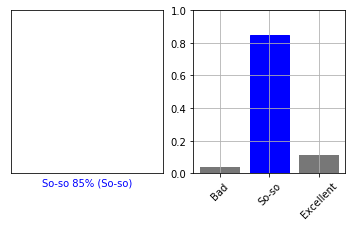

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, TrainLabels)
plt.subplot(1,2,2)
plot_value_array(i, predictions, TrainLabels)
plt.xticks(range(3), class_names, rotation=45)
plt.show()
# Blue bar is correct.  If red bar appears, it is the incorrect prediction of the model.

In [18]:
predictions[0]


array([0.03914519, 0.8503457 , 0.11050913], dtype=float32)

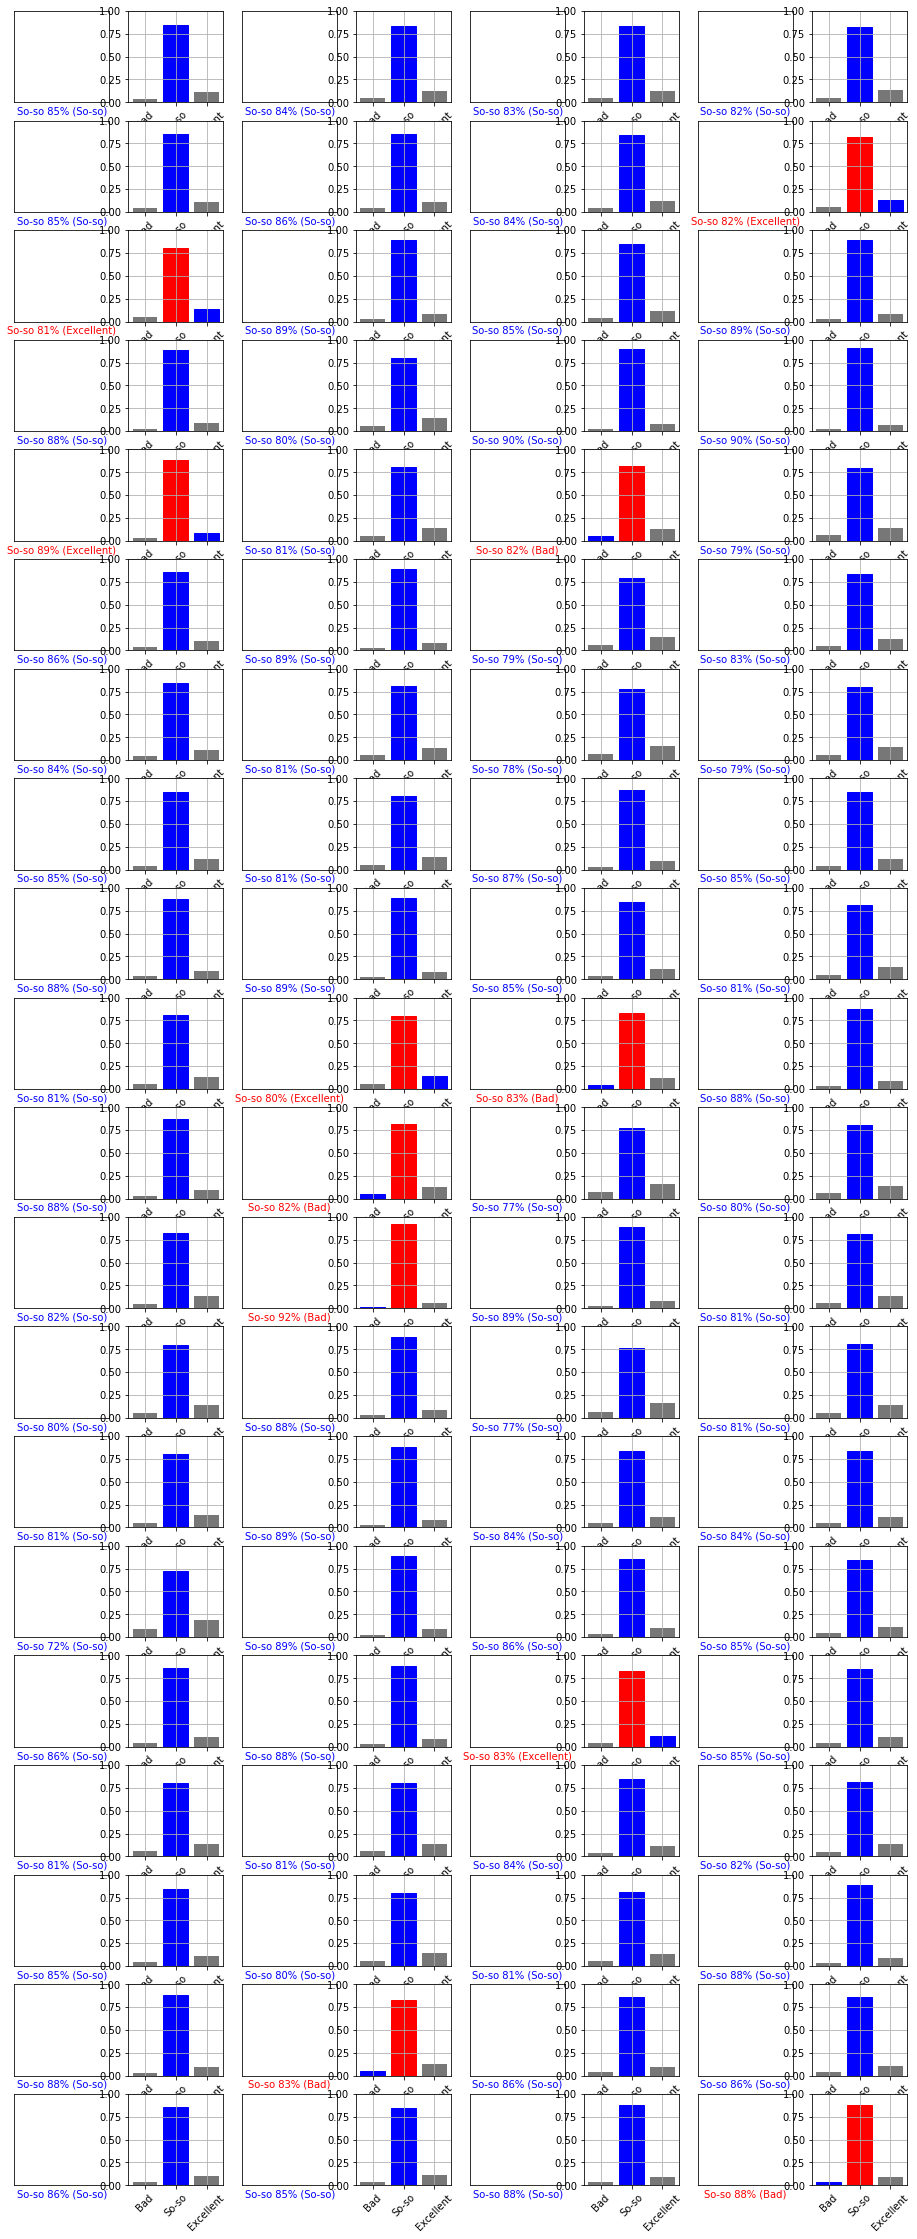

In [19]:
num_rows = 20
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, TrainLabels)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, TrainLabels)
  plt.xticks(range(3), class_names, rotation=45)
plt.show()


In [20]:
layer0 = model.get_layer(index=0)


In [21]:
layer0.get_weights()

[array([[ 0.20885694,  0.20117699, -0.6282039 ,  0.735851  , -0.5813141 ,
          0.8068935 , -0.6153555 ],
        [ 1.015416  ,  0.90577054, -0.43958223,  0.7343092 ,  0.51514167,
          0.08134251, -0.7406225 ],
        [-0.40388095, -0.34370792,  0.05180722,  0.25927657, -0.61226946,
          0.4713143 ,  0.0793047 ]], dtype=float32),
 array([0.36125985, 0.36583287, 0.        , 0.16809265, 0.01993481,
        0.23582745, 0.        ], dtype=float32)]

In [22]:
layer1 = model.get_layer(index=1)

In [23]:
layer1.get_weights()

[array([[ 0.03625726,  0.93077797,  0.26669496],
        [-0.73237675,  0.7382587 ,  0.07006648],
        [-0.22232807, -0.5860131 , -0.14501691],
        [-0.22798389,  0.3158312 , -0.83823615],
        [-0.49224305, -0.7398238 , -0.6033094 ],
        [-0.40985206,  0.9081314 ,  0.6215913 ],
        [-0.36237824,  0.26753068, -0.22437096]], dtype=float32),
 array([-0.21405552,  0.17499755, -0.10198112], dtype=float32)]

In [24]:
#predictionsDF = pd.DataFrame(
#    data=predictions[1:,1:],    # values
#    index=predictions[1:,0],    # 1st column as index
#    columns=predictions[0,1:])  # 1st row as the column names

predictionsDF = pd.DataFrame(
    data=predictions)


In [25]:
predictionsDF.to_csv("Predictions1.csv", encoding='utf-8', header=False, index=False)


In [26]:
TrainLabels = np.array(TrainLabels)

In [27]:
PredictedLabels = np.ndarray.copy(TrainLabels)
PredictedOutcomes = np.ndarray.copy(TrainLabels)
for i in range(len(TrainLabels)):
  PredictedLabels[i] = np.argmax(predictions[i])
  if PredictedLabels[i] == TrainLabels[i]:
    PredictedOutcomes[i] = 1
  else:
    PredictedOutcomes[i] = 0

In [28]:
TrainDataLabels = np.append(TrainData, TrainLabels, axis=1)
TrainDataLabelsPredictions = np.append(TrainDataLabels, PredictedLabels, axis=1)
TrainDataLabelsPredictionsOutcomes = np.append(TrainDataLabelsPredictions, PredictedOutcomes, axis=1)
TrainDataLabelsPredictionsOutcomesProb = np.append(TrainDataLabelsPredictionsOutcomes, predictions, axis=1)


In [29]:
TDLPOP_DF = pd.DataFrame(
    data=TrainDataLabelsPredictionsOutcomesProb)

In [30]:
TDLPOP_DF.to_csv("Predictions2.csv", encoding='utf-8', header=False, index=False)

In [31]:
SingleObservation = np.array([[0.9, 0.9, 0.9]])
SinglePrediction = model.predict(SingleObservation)

In [32]:
SinglePrediction[0]

array([0.00302333, 0.9810265 , 0.01595029], dtype=float32)

In [33]:
np.max(SinglePrediction[0])

0.9810265

In [34]:
np.argmax(SinglePrediction[0])

1

In [35]:
class_names[np.argmax(SinglePrediction[0])]

'So-so'

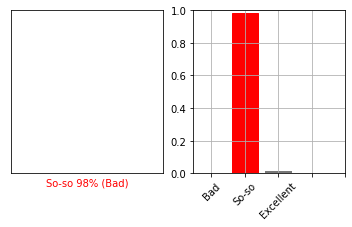

In [36]:
BlankLabels = np.array([[0, 0, 0, 0, 0]])

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, SinglePrediction, BlankLabels)
plt.subplot(1,2,2)
plot_value_array(i, SinglePrediction, BlankLabels)
plt.xticks(range(5), class_names, rotation=45)
plt.show()

In [37]:
!date

Tue Oct 22 01:25:46 UTC 2019
